In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
from geonamescache import GeonamesCache
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [2]:
## This is the working directory I saved for latter use

work_directory=os.getcwd()

In [6]:
def print_columns(df):
    print "There are",df.shape[1],'columns'
    print "They are:"
    for i in df.columns.values:
        print i
        
def list_null(df):
    print df.shape[1],' columns:'
    for i in df.columns.values:
        print i,': number of nan: ',df[i].isnull().sum(),', ',df[i].dtypes

## 1. Get to know our dataset

In [3]:
df=pd.read_csv('dataframe.csv',sep=',')

In [4]:
df.head()

,country,year,Happiness,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,"GINI index (World Bank estimate), average 2000-13",child,...,income,homicide,ecoFree,uniEnro,area,alcohol,unemploy,food,suicide,visitor
0,Afghanistan,2012,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,0.300000,99.5,...,512,6.6,1.0,4.0,652860,0.01,8.5,2100.0,5.7,0
1,Albania,2012,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.305000,15.5,...,4245,5.5,65.1,58.6,27400,5.14,13.9,3023.0,5.9,3156000
2,Algeria,2012,5.604596,9.487703,NaN,0.839397,64.001305,-0.198894,NaN,26.1,...,4532,1.3,51.0,32.2,2381740,0.66,11.0,3272.0,1.9,2634000
3,Angola,2012,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,0.473400,172.2,...,3505,9.8,46.7,6.9,1246700,8.24,6.9,2384.0,13.8,528000
4,Argentina,2012,6.468387,9.805600,0.418255,0.901776,66.838005,-0.160000,0.479421,13.8,...,10391,6.6,48.0,79.0,2736690,8.35,7.2,3155.0,10.3,5587000


In [7]:
print_columns(df)

There are 23 columns
They are:
country
year
Happiness
Log GDP per capita
Confidence in national government
Social support
Healthy life expectancy at birth
Generosity
GINI index (World Bank estimate), average 2000-13
child
healthExp
publicEdu
ave_visitor
income
homicide
ecoFree
uniEnro
area
alcohol
unemploy
food
suicide
visitor


In [8]:
list_null(df)

23  columns:
country : number of nan:  0 ,  object
year : number of nan:  0 ,  int64
Happiness : number of nan:  0 ,  float64
Log GDP per capita : number of nan:  0 ,  float64
Confidence in national government : number of nan:  18 ,  float64
Social support : number of nan:  0 ,  float64
Healthy life expectancy at birth : number of nan:  1 ,  float64
Generosity : number of nan:  2 ,  float64
GINI index (World Bank estimate), average 2000-13 : number of nan:  10 ,  float64
child : number of nan:  0 ,  float64
healthExp : number of nan:  0 ,  object
publicEdu : number of nan:  12 ,  float64
ave_visitor : number of nan:  0 ,  float64
income : number of nan:  0 ,  int64
homicide : number of nan:  0 ,  float64
ecoFree : number of nan:  3 ,  float64
uniEnro : number of nan:  11 ,  float64
area : number of nan:  0 ,  int64
alcohol : number of nan:  3 ,  float64
unemploy : number of nan:  1 ,  float64
food : number of nan:  11 ,  float64
suicide : number of nan:  3 ,  float64
visitor : number o

In [9]:
df.describe()

C:\Users\Tsymbal Group Member\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,year,Happiness,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,"GINI index (World Bank estimate), average 2000-13",child,publicEdu,ave_visitor,income,homicide,ecoFree,uniEnro,area,alcohol,unemploy,food,suicide,visitor
count,139.0,139.000000,139.000000,121.000000,139.000000,138.000000,137.000000,129.000000,139.000000,127.000000,139.000000,139.000000,139.000000,136.000000,128.000000,1.390000e+02,136.000000,138.000000,128.000000,136.000000,1.390000e+02
mean,2012.0,5.450866,9.266118,0.447821,0.809074,62.569353,-0.009630,0.388313,32.291367,4.430709,425.495944,14156.582734,6.983453,60.466912,40.953906,8.980851e+05,5.288676,8.398551,2893.914062,9.633088,7.080086e+06
std,0.0,1.128793,1.196496,0.170278,0.113748,7.734924,0.157337,0.086137,35.921723,1.655031,2507.353419,18803.492625,11.435234,12.268617,27.966921,2.130213e+06,4.124146,5.781799,458.679035,6.344786,1.302340e+07
min,2012.0,3.164491,6.462388,0.126219,0.510575,43.811398,-0.312890,0.210980,2.100000,0.800000,0.000000,316.000000,0.000000,1.000000,0.800000,3.200000e+02,0.000000,0.200000,1923.000000,0.400000,0.000000e+00
25%,2012.0,4.587393,8.399001,NaN,0.741440,NaN,NaN,NaN,6.150000,NaN,1.497899,1473.500000,1.250000,NaN,NaN,7.191500e+04,NaN,NaN,NaN,NaN,7.215000e+05
50%,2012.0,5.309076,9.433867,NaN,0.826426,NaN,NaN,NaN,16.300000,NaN,9.391971,5310.000000,3.400000,NaN,NaN,2.457200e+05,NaN,NaN,NaN,NaN,2.156000e+06
75%,2012.0,6.279989,10.155374,NaN,0.904355,NaN,NaN,NaN,49.400000,NaN,60.410947,18185.500000,7.950000,NaN,NaN,7.434610e+05,NaN,NaN,NaN,NaN,7.555000e+06
max,2012.0,7.776209,11.797896,0.856454,0.978965,75.401466,0.368961,0.625950,172.200000,9.600000,22638.095240,89346.000000,92.700000,89.900000,110.300000,1.637687e+07,16.350000,31.100000,3793.000000,28.900000,8.198000e+07


## 2. Fill in the null value

### 2.1 confidence

In [39]:
confidence=pd.DataFrame()

confidence['confidence']=df['Confidence in national government']
confidence['confidence'][confidence['confidence'].isnull()]=confidence['confidence'].mean()

df['Confidence in national government']=confidence['confidence']

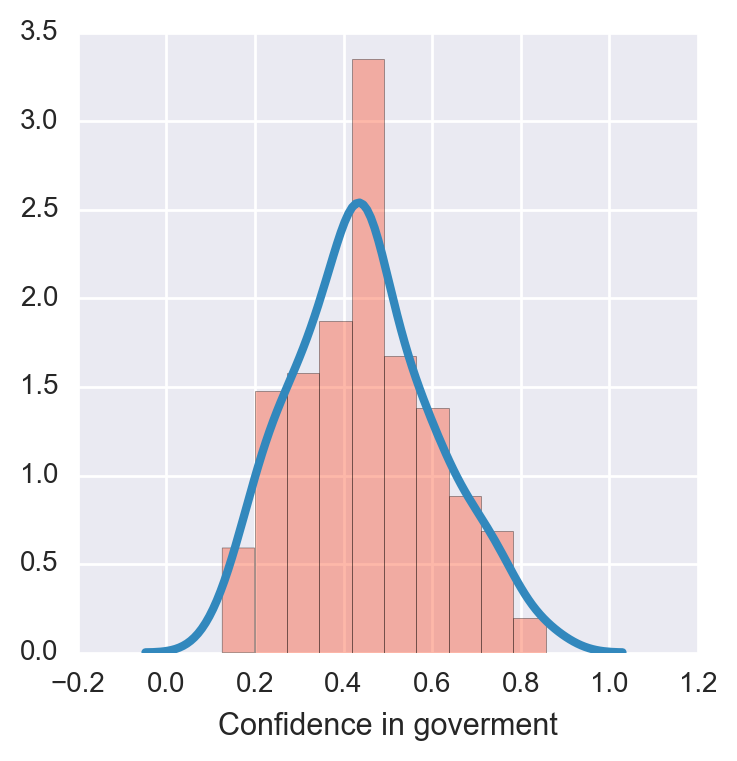

In [20]:
fig,axes=plt.subplots(1,1,figsize=(4,4))
kde_kws={"color": "#3288bd", "lw": 3}
plt.legend(loc='best')
sns.distplot(confidence['confidence'], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#fc4e2a',vertical=False, norm_hist=False, axlabel='Confidence in goverment', label=None, ax=None)

### 2.2 Healthy life expectancy at birth

In [41]:
life_expectancy=pd.DataFrame()

life_expectancy['expectancy']=df['Healthy life expectancy at birth']
life_expectancy['expectancy'][life_expectancy['expectancy'].isnull()]=life_expectancy['expectancy'].mean()

df['Healthy life expectancy at birth']=life_expectancy['expectancy']

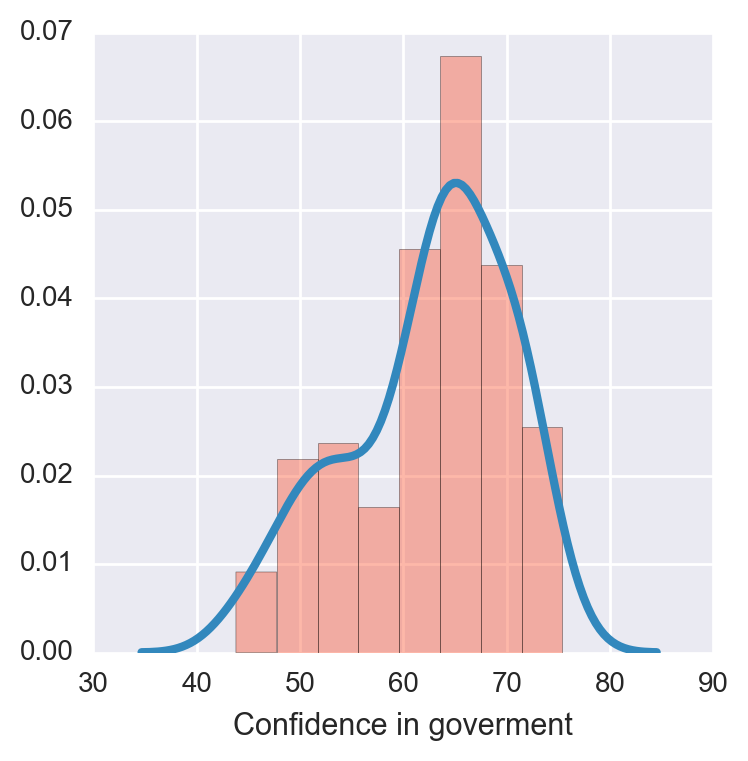

In [22]:
fig,axes=plt.subplots(1,1,figsize=(4,4))
kde_kws={"color": "#3288bd", "lw": 3}
plt.legend(loc='best')
sns.distplot(life_expectancy['expectancy'], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#fc4e2a',vertical=False, norm_hist=False, axlabel='Confidence in goverment', label=None, ax=None)

### 2.3 GINI index (World Bank estimate), average 2000-13

In [42]:
gini_index=pd.DataFrame()

gini_index['gini']=df['GINI index (World Bank estimate), average 2000-13']
gini_index['gini'][gini_index['gini'].isnull()]=gini_index['gini'].mean()

df['GINI index (World Bank estimate), average 2000-13']=gini_index['gini']

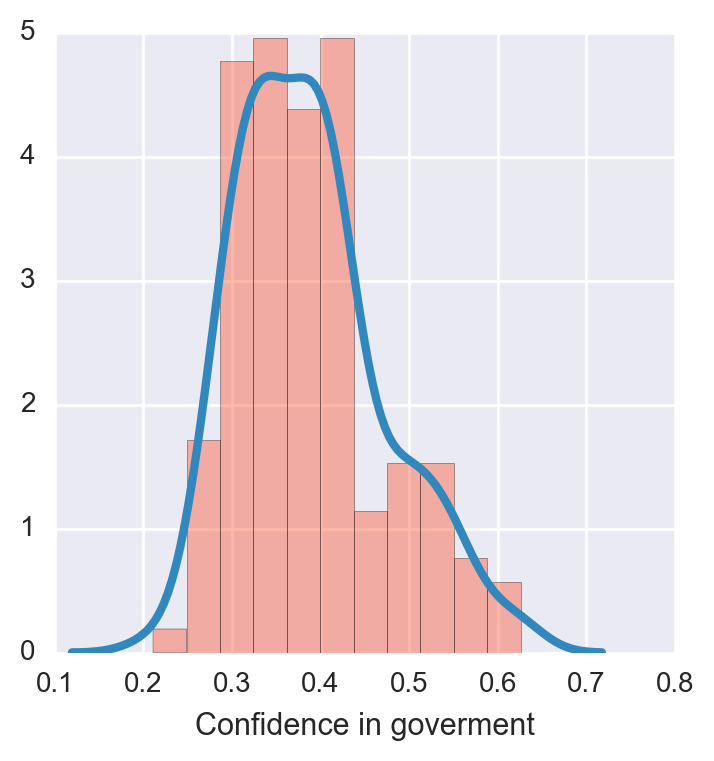

In [24]:
fig,axes=plt.subplots(1,1,figsize=(4,4))
kde_kws={"color": "#3288bd", "lw": 3}
plt.legend(loc='best')
sns.distplot(gini_index['gini'], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#fc4e2a',vertical=False, norm_hist=False, axlabel='Confidence in goverment', label=None, ax=None)

### 2.4 publicEdu

In [43]:
publicEdu=pd.DataFrame()

publicEdu['publicEdu']=df['publicEdu']
publicEdu['publicEdu'][publicEdu['publicEdu'].isnull()]=publicEdu['publicEdu'].mean()

df['publicEdu']=publicEdu['publicEdu']

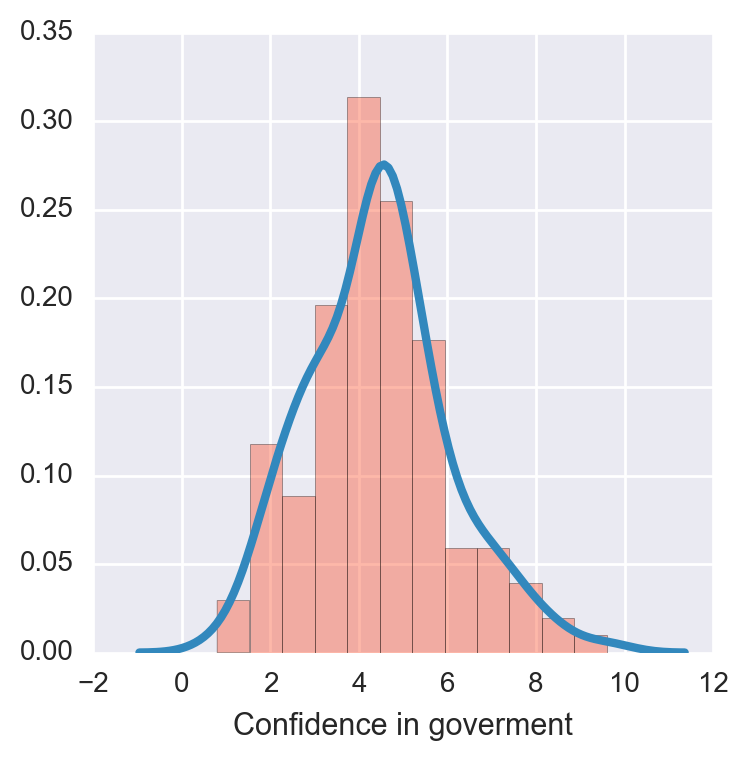

In [26]:
fig,axes=plt.subplots(1,1,figsize=(4,4))
kde_kws={"color": "#3288bd", "lw": 3}
plt.legend(loc='best')
sns.distplot(publicEdu['publicEdu'], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#fc4e2a',vertical=False, norm_hist=False, axlabel='Confidence in goverment', label=None, ax=None)

### 2.5 ecoFree

In [44]:
ecoFree=pd.DataFrame()

ecoFree['ecoFree']=df['ecoFree']
ecoFree['ecoFree'][ecoFree['ecoFree'].isnull()]=ecoFree['ecoFree'].mean()

df['ecoFree']=ecoFree['ecoFree']

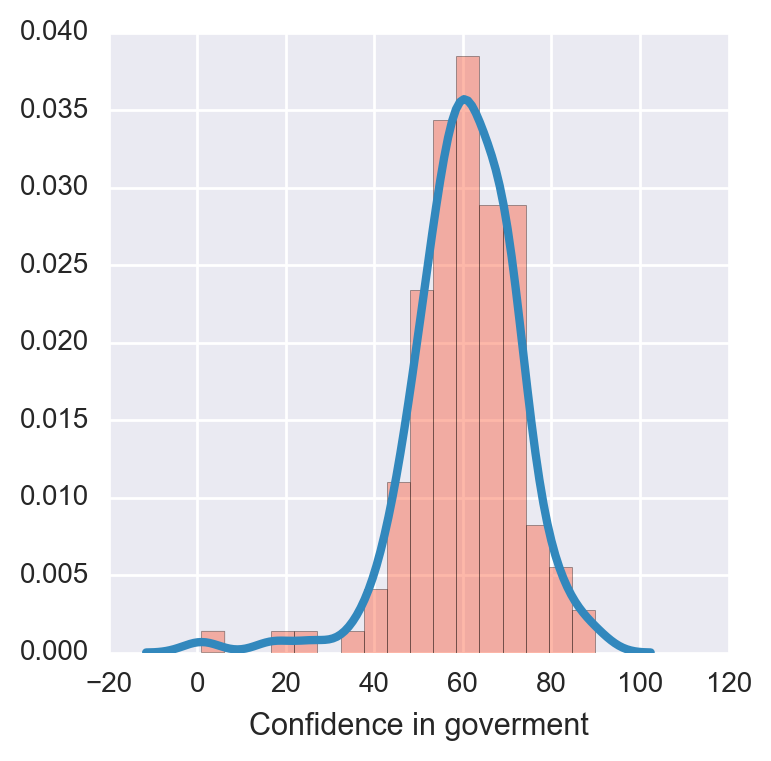

In [28]:
fig,axes=plt.subplots(1,1,figsize=(4,4))
kde_kws={"color": "#3288bd", "lw": 3}
plt.legend(loc='best')
sns.distplot(ecoFree['ecoFree'], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#fc4e2a',vertical=False, norm_hist=False, axlabel='Confidence in goverment', label=None, ax=None)

### 2.6 University Enrollment

In [45]:
uniEnro=pd.DataFrame()

uniEnro['uniEnro']=df['uniEnro']
uniEnro['uniEnro'][uniEnro['uniEnro'].isnull()]=uniEnro['uniEnro'].mean()

df['uniEnro']=uniEnro['uniEnro']

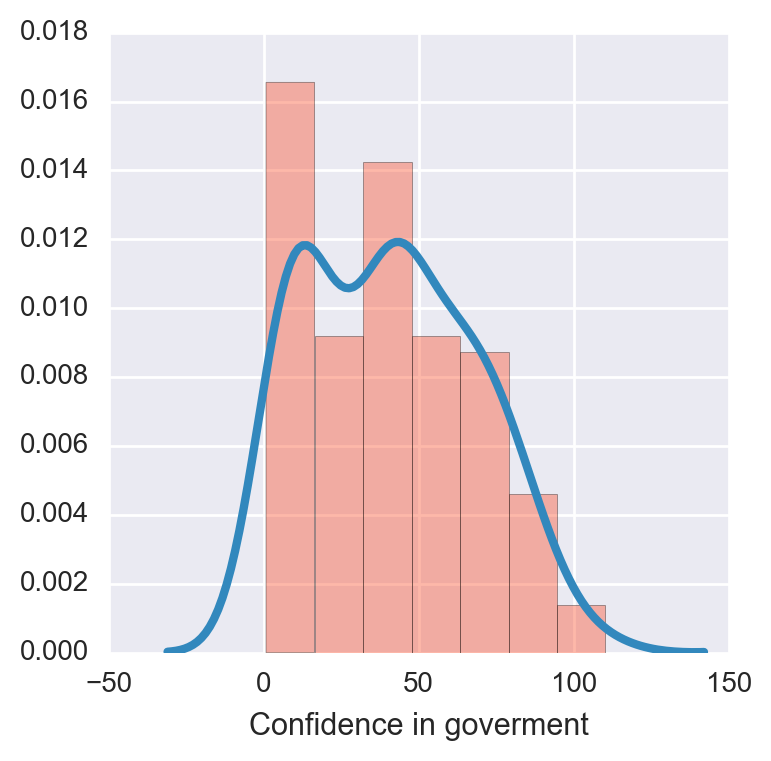

In [30]:
fig,axes=plt.subplots(1,1,figsize=(4,4))
kde_kws={"color": "#3288bd", "lw": 3}
plt.legend(loc='best')
sns.distplot(uniEnro['uniEnro'], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#fc4e2a',vertical=False, norm_hist=False, axlabel='Confidence in goverment', label=None, ax=None)

alcohol : number of nan:  3 ,  float64
unemploy : number of nan:  1 ,  float64
food : number of nan:  11 ,  float64
suicide : number of nan:  3 ,  float64

### 2.7 Alcohol consumption

In [46]:
alcohol=pd.DataFrame()

alcohol['alcohol']=df['alcohol']
alcohol['alcohol'][alcohol['alcohol'].isnull()]=alcohol['alcohol'].mean()

df['alcohol']=alcohol['alcohol']

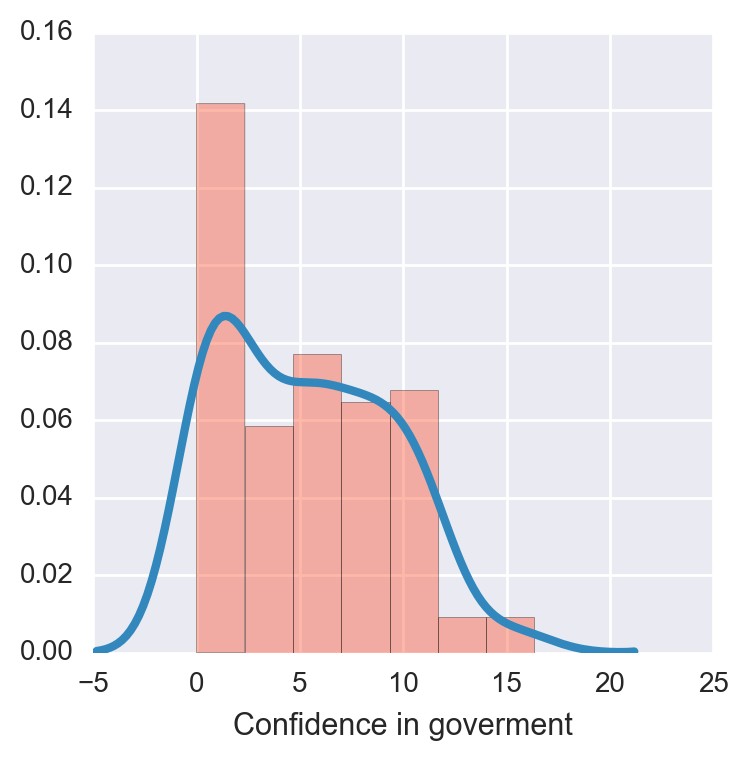

In [32]:
fig,axes=plt.subplots(1,1,figsize=(4,4))
kde_kws={"color": "#3288bd", "lw": 3}
plt.legend(loc='best')
sns.distplot(alcohol['alcohol'], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#fc4e2a',vertical=False, norm_hist=False, axlabel='Confidence in goverment', label=None, ax=None)

### 2.8 Unemployment rate

In [47]:
unemploy=pd.DataFrame()

unemploy['unemploy']=df['unemploy']
unemploy['unemploy'][unemploy['unemploy'].isnull()]=unemploy['unemploy'].mean()

df['unemploy']=unemploy['unemploy']

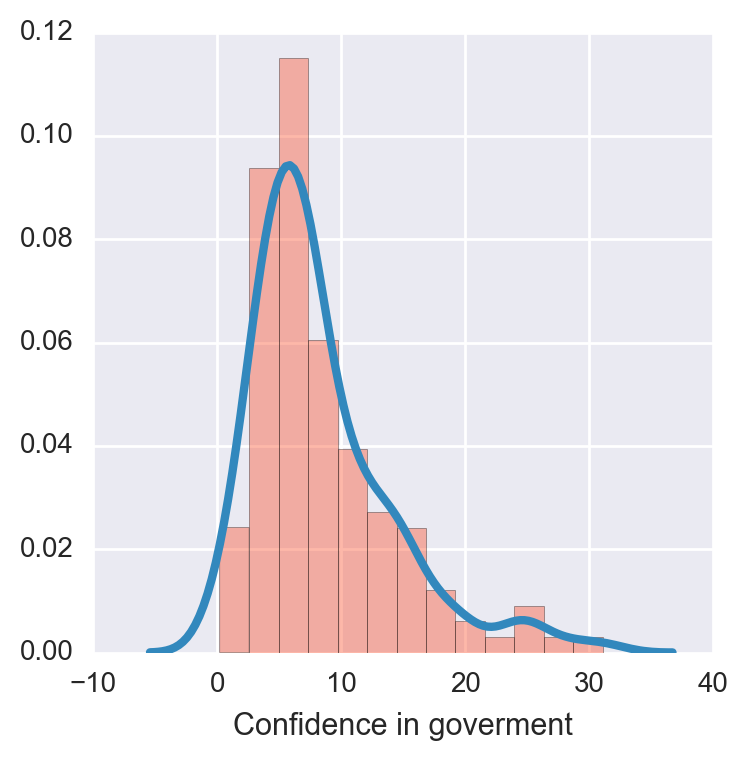

In [34]:
fig,axes=plt.subplots(1,1,figsize=(4,4))
kde_kws={"color": "#3288bd", "lw": 3}
plt.legend(loc='best')
sns.distplot(unemploy['unemploy'], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#fc4e2a',vertical=False, norm_hist=False, axlabel='Confidence in goverment', label=None, ax=None)

### 2.9 Food consumption

In [48]:
food=pd.DataFrame()

food['food']=df['food']
food['food'][food['food'].isnull()]=food['food'].mean()

df['food']=food['food']

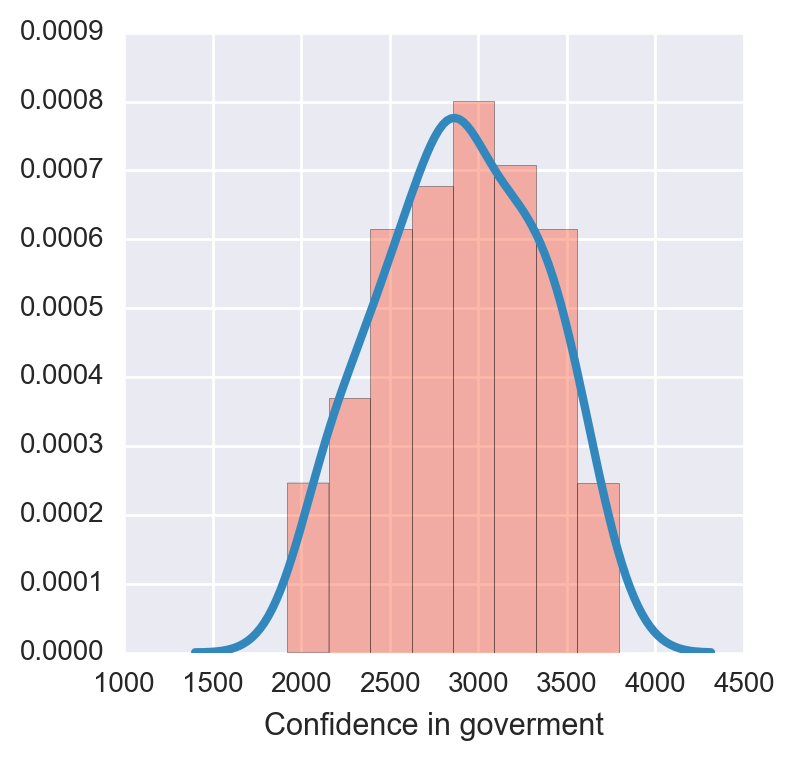

In [36]:
fig,axes=plt.subplots(1,1,figsize=(4,4))
kde_kws={"color": "#3288bd", "lw": 3}
plt.legend(loc='best')
sns.distplot(food['food'], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#fc4e2a',vertical=False, norm_hist=False, axlabel='Confidence in goverment', label=None, ax=None)

### 2.10 Suicide rate

In [49]:
suicide=pd.DataFrame()

suicide['suicide']=df['suicide']
suicide['suicide'][suicide['suicide'].isnull()]=suicide['suicide'].mean()

df['suicide']=suicide['suicide']

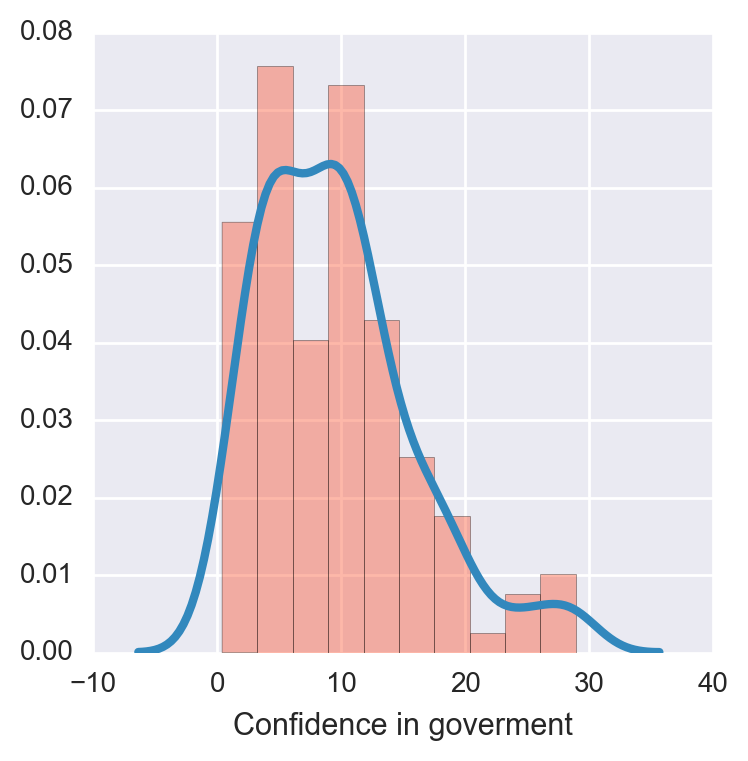

In [38]:
fig,axes=plt.subplots(1,1,figsize=(4,4))
kde_kws={"color": "#3288bd", "lw": 3}
plt.legend(loc='best')
sns.distplot(suicide['suicide'], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#fc4e2a',vertical=False, norm_hist=False, axlabel='Confidence in goverment', label=None, ax=None)

**Conclusion**

In our dataset, all the features are oridnal dataset. Their distribution takes the normal distribuion. So that we can try to fill the **NaN** value by the mean values

In [52]:
list_null(df)

23  columns:
country : number of nan:  0 ,  object
year : number of nan:  0 ,  int64
Happiness : number of nan:  0 ,  float64
Log GDP per capita : number of nan:  0 ,  float64
Confidence in national government : number of nan:  0 ,  float64
Social support : number of nan:  0 ,  float64
Healthy life expectancy at birth : number of nan:  0 ,  float64
Generosity : number of nan:  0 ,  float64
GINI index (World Bank estimate), average 2000-13 : number of nan:  0 ,  float64
child : number of nan:  0 ,  float64
healthExp : number of nan:  0 ,  object
publicEdu : number of nan:  0 ,  float64
ave_visitor : number of nan:  0 ,  float64
income : number of nan:  0 ,  int64
homicide : number of nan:  0 ,  float64
ecoFree : number of nan:  0 ,  float64
uniEnro : number of nan:  0 ,  float64
area : number of nan:  0 ,  int64
alcohol : number of nan:  0 ,  float64
unemploy : number of nan:  0 ,  float64
food : number of nan:  0 ,  float64
suicide : number of nan:  0 ,  float64
visitor : number of nan

In [51]:
generosity=pd.DataFrame()

generosity['generosity']=df['Generosity']
generosity['generosity'][generosity['generosity'].isnull()]=generosity['generosity'].mean()

df['Generosity']=generosity['generosity']

## 3. Correlation between data

In [53]:
dff=df.drop(['country','year'],axis=1)

In [54]:
dff.head()

,Happiness,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,"GINI index (World Bank estimate), average 2000-13",child,healthExp,publicEdu,ave_visitor,income,homicide,ecoFree,uniEnro,area,alcohol,unemploy,food,suicide,visitor
0,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,0.300000,99.5,58,3.1,0.000000,512,6.6,1.0,4.0,652860,0.01,8.5,2100.0,5.7,0
1,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.305000,15.5,240,3.5,115.182482,4245,5.5,65.1,58.6,27400,5.14,13.9,3023.0,5.9,3156000
2,5.604596,9.487703,0.447821,0.839397,64.001305,-0.198894,0.388313,26.1,335,4.3,1.105914,4532,1.3,51.0,32.2,2381740,0.66,11.0,3272.0,1.9,2634000
3,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,0.473400,172.2,168,3.4,0.423518,3505,9.8,46.7,6.9,1246700,8.24,6.9,2384.0,13.8,528000
4,6.468387,9.805600,0.418255,0.901776,66.838005,-0.160000,0.479421,13.8,727,5.1,2.041517,10391,6.6,48.0,79.0,2736690,8.35,7.2,3155.0,10.3,5587000


In [80]:
dff['healthExp']=dff['healthExp'].str.replace(',','').astype(float)

In [72]:
print dff.columns.values
print len(dff.columns.values)

['Happiness' 'Log GDP per capita' 'Confidence in national government'
 'Social support' 'Healthy life expectancy at birth' 'Generosity'
 'GINI index (World Bank estimate), average 2000-13' 'child' 'healthExp'
 'publicEdu' 'ave_visitor' 'income' 'homicide' 'ecoFree' 'uniEnro' 'area'
 'alcohol' 'unemploy' 'food' 'suicide' 'visitor']
21


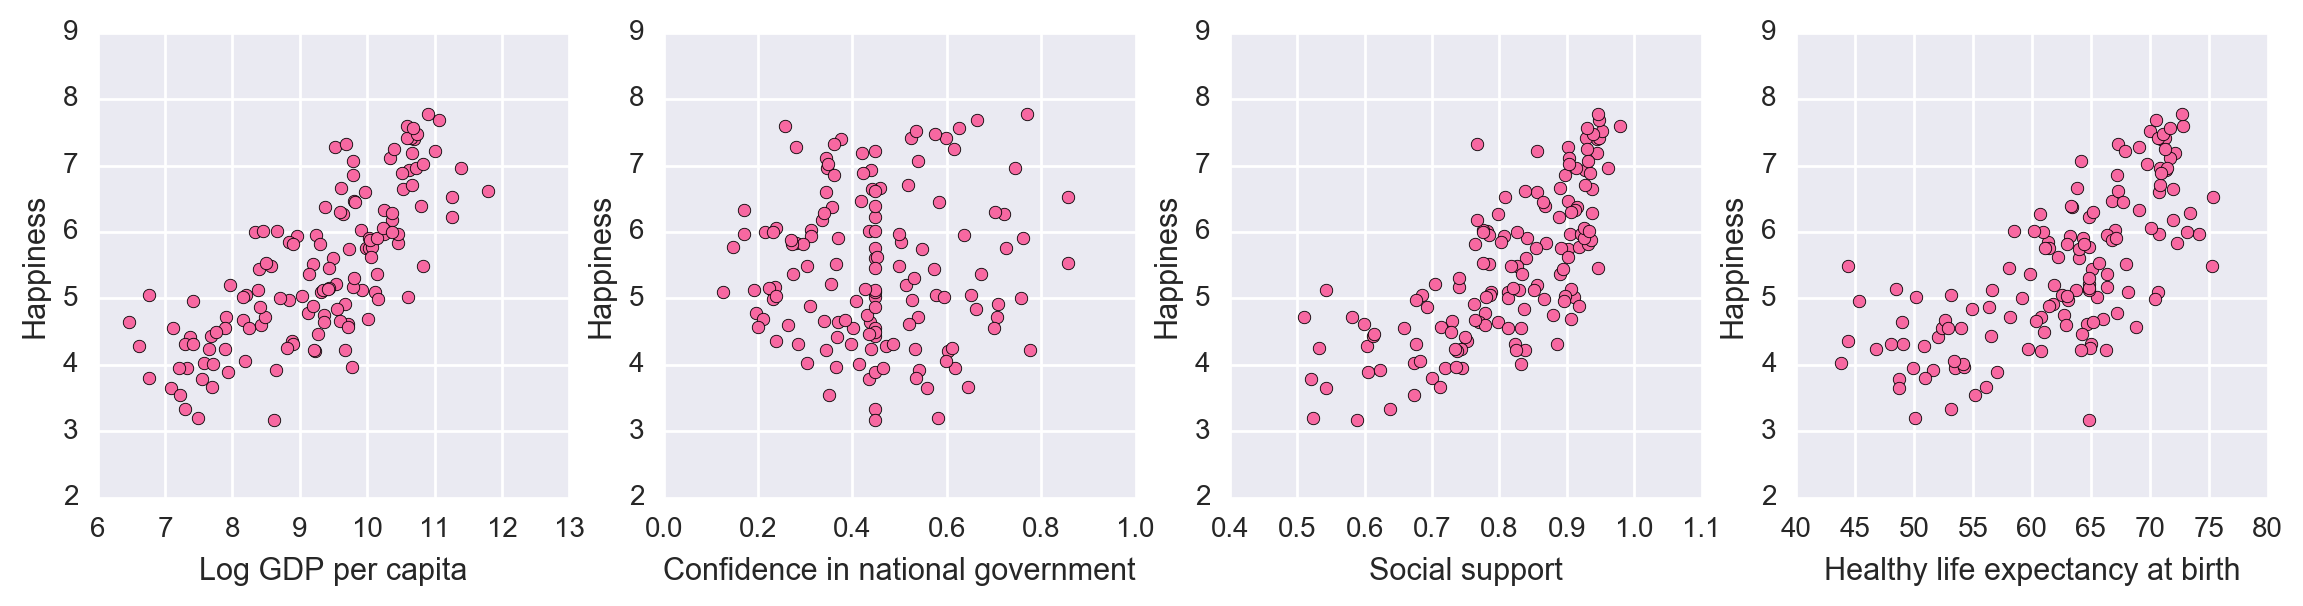

In [71]:
fig, axes = plt.subplots(1, 4, figsize=(14,3))

for i in range(1,len(dff.columns.values)-16):
    axes[i-1].scatter(dff[dff.columns.values[i]], dff['Happiness'],c='#f768a1', marker="o")
    axes[i-1].set_xlabel(dff.columns.values[i])
    axes[i-1].set_ylabel("Happiness")

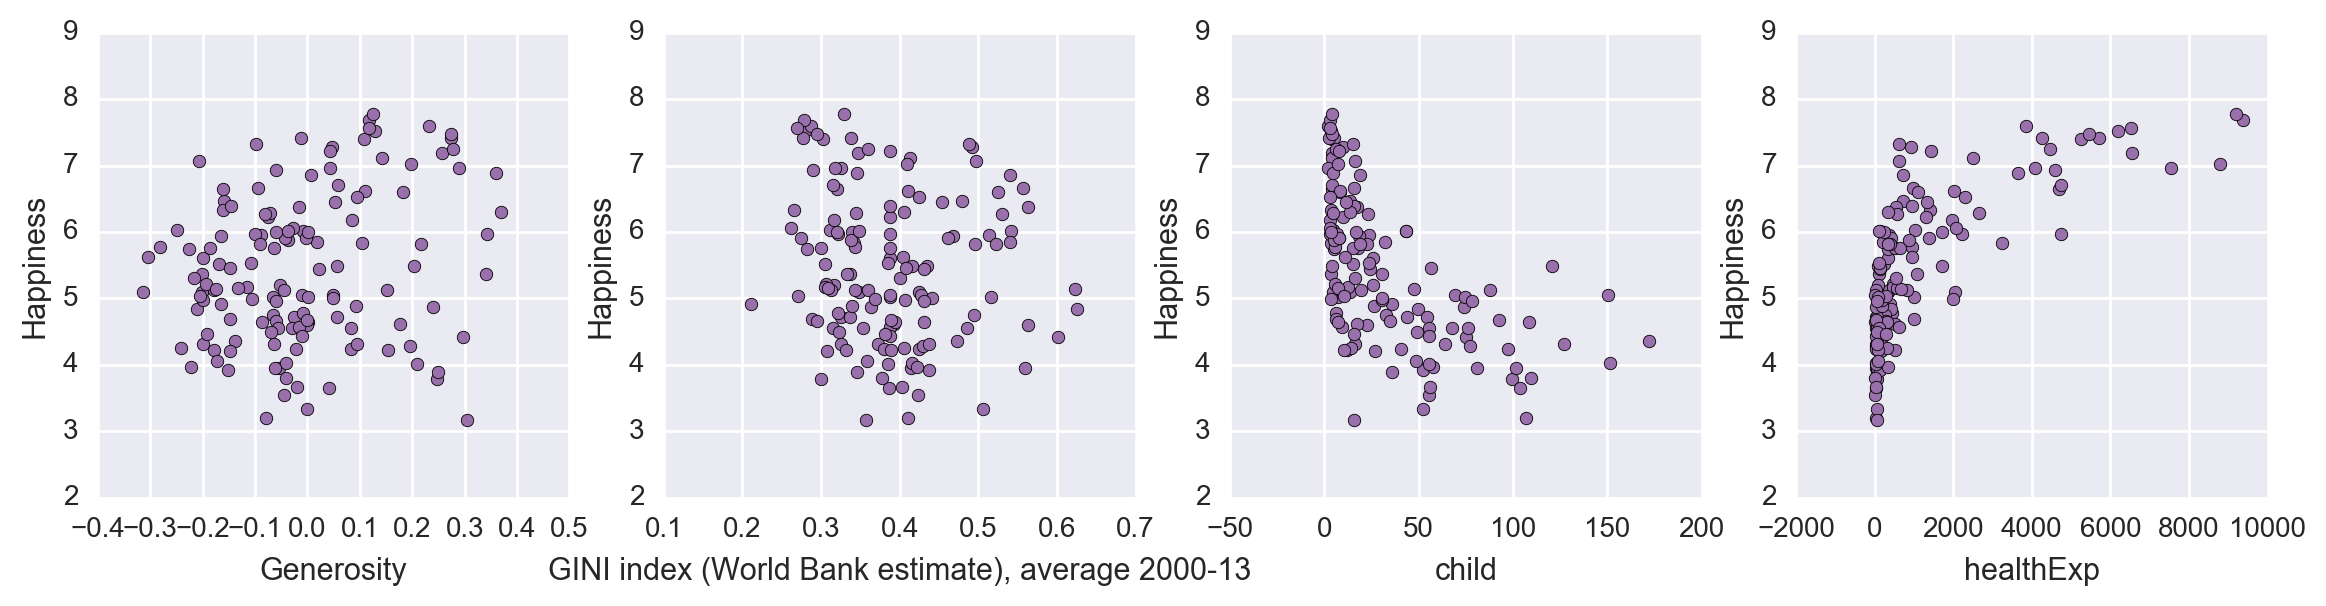

In [81]:
fig, axes = plt.subplots(1, 4, figsize=(14,3))

for i in range(len(dff.columns.values)-16,len(dff.columns.values)-12):
    axes[i-5].scatter(dff[dff.columns.values[i]], dff['Happiness'],c='#9970ab', marker="o")
    axes[i-5].set_xlabel(dff.columns.values[i])
    axes[i-5].set_ylabel("Happiness")

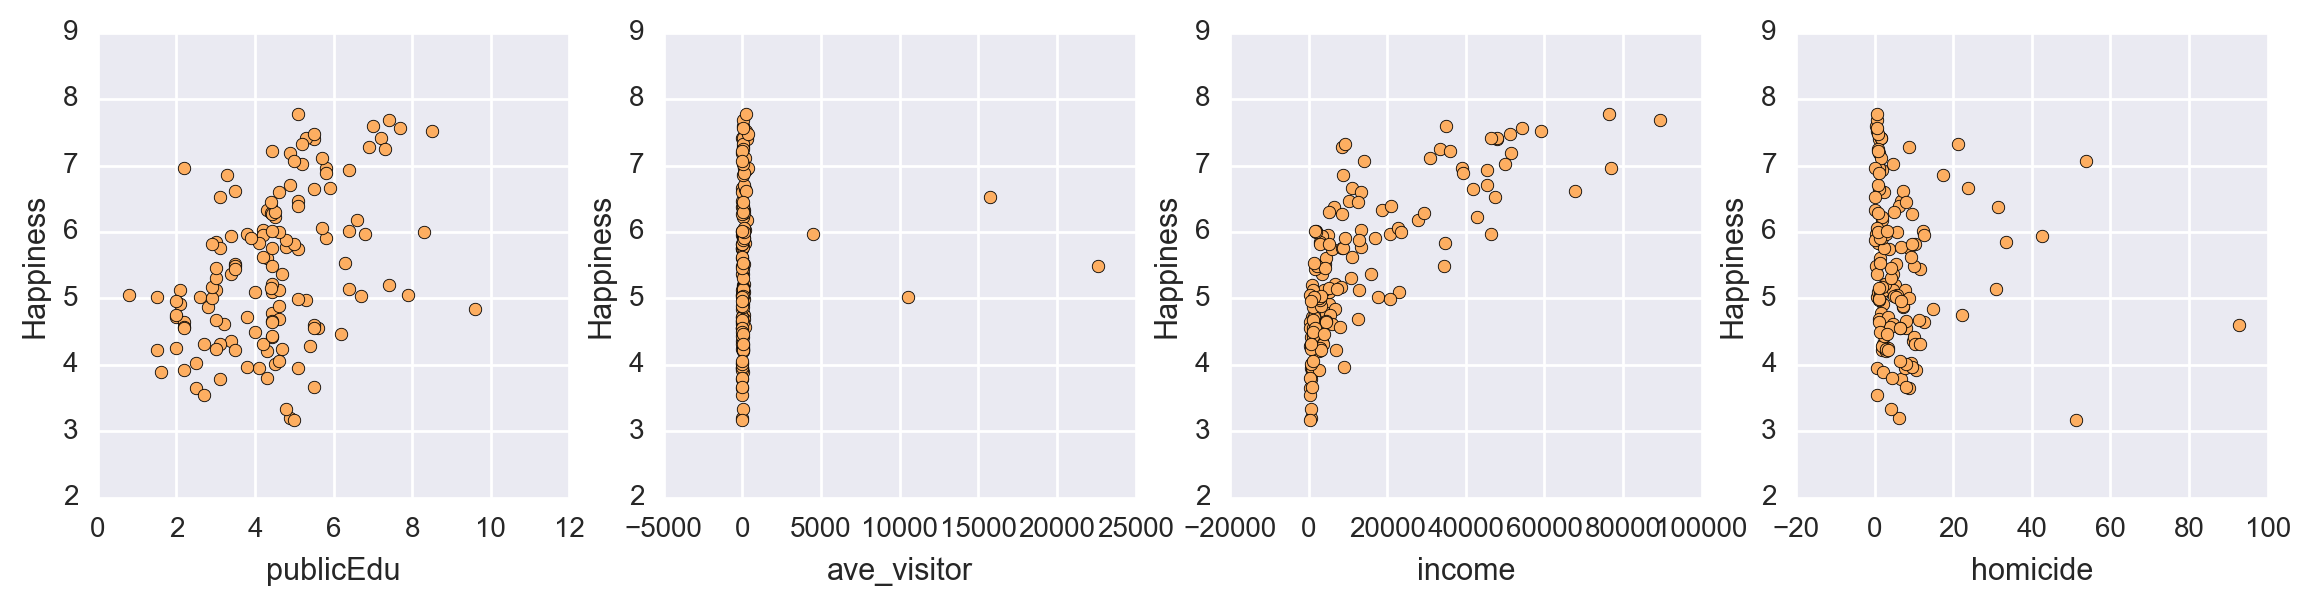

In [82]:
fig, axes = plt.subplots(1, 4, figsize=(14,3))

for i in range(len(dff.columns.values)-12,len(dff.columns.values)-8):
    axes[i-9].scatter(dff[dff.columns.values[i]], dff['Happiness'],c='#fdae61', marker="o")
    axes[i-9].set_xlabel(dff.columns.values[i])
    axes[i-9].set_ylabel("Happiness")

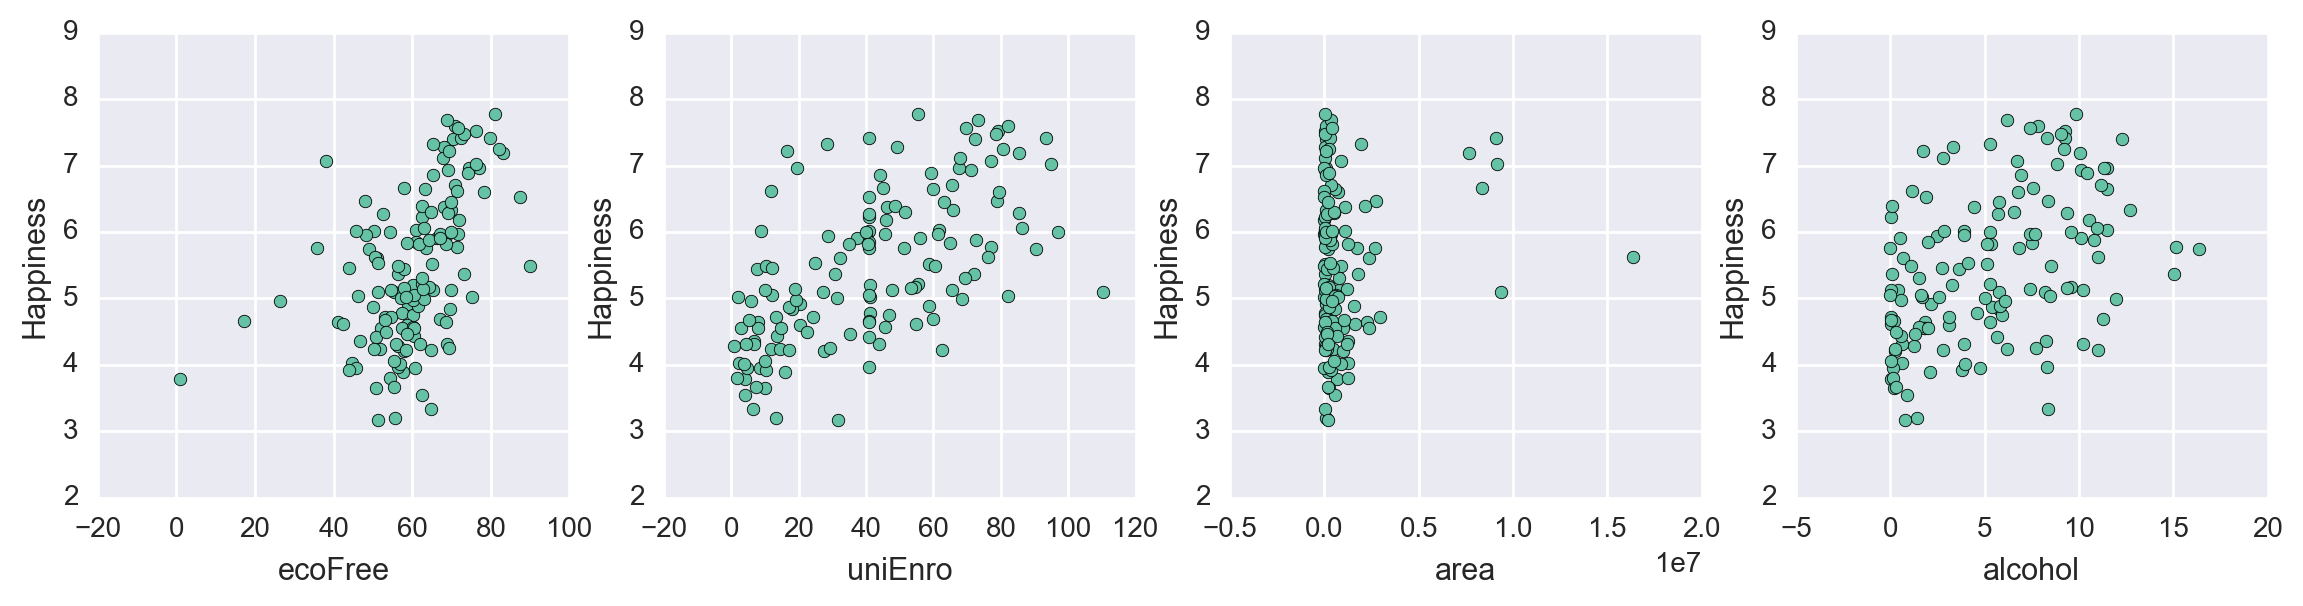

In [83]:
fig, axes = plt.subplots(1, 4, figsize=(14,3))

for i in range(len(dff.columns.values)-8,len(dff.columns.values)-4):
    axes[i-13].scatter(dff[dff.columns.values[i]], dff['Happiness'],c='#66c2a5', marker="o")
    axes[i-13].set_xlabel(dff.columns.values[i])
    axes[i-13].set_ylabel("Happiness")

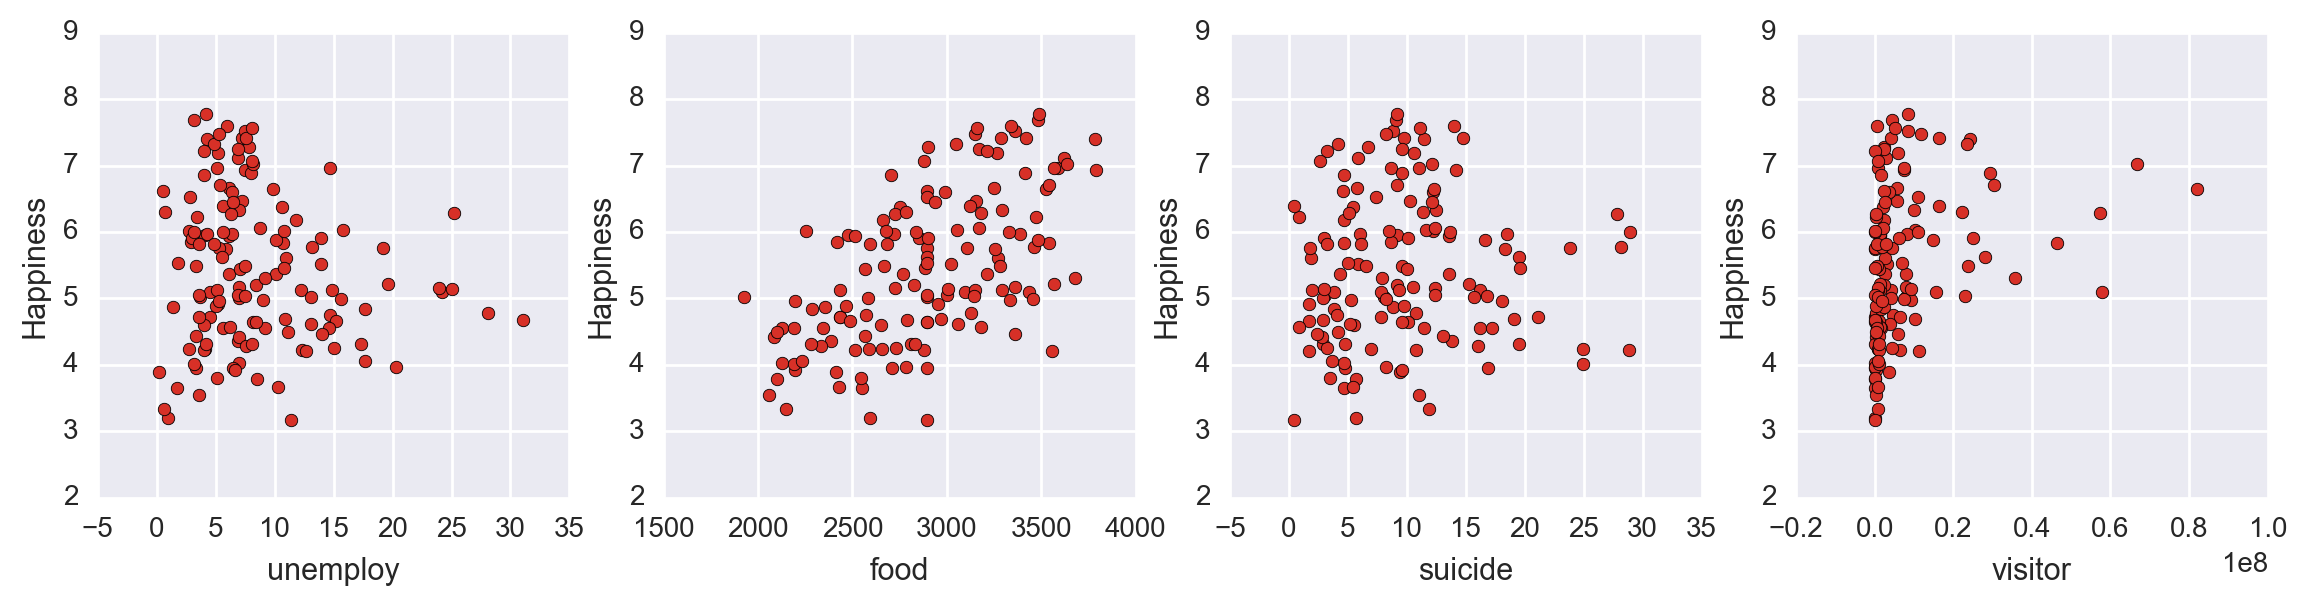

In [85]:
fig, axes = plt.subplots(1, 4, figsize=(14,3))

for i in range(len(dff.columns.values)-4,len(dff.columns.values)):
    axes[i-17].scatter(dff[dff.columns.values[i]], dff['Happiness'],c='#d73027', marker="o")
    axes[i-17].set_xlabel(dff.columns.values[i])
    axes[i-17].set_ylabel("Happiness")

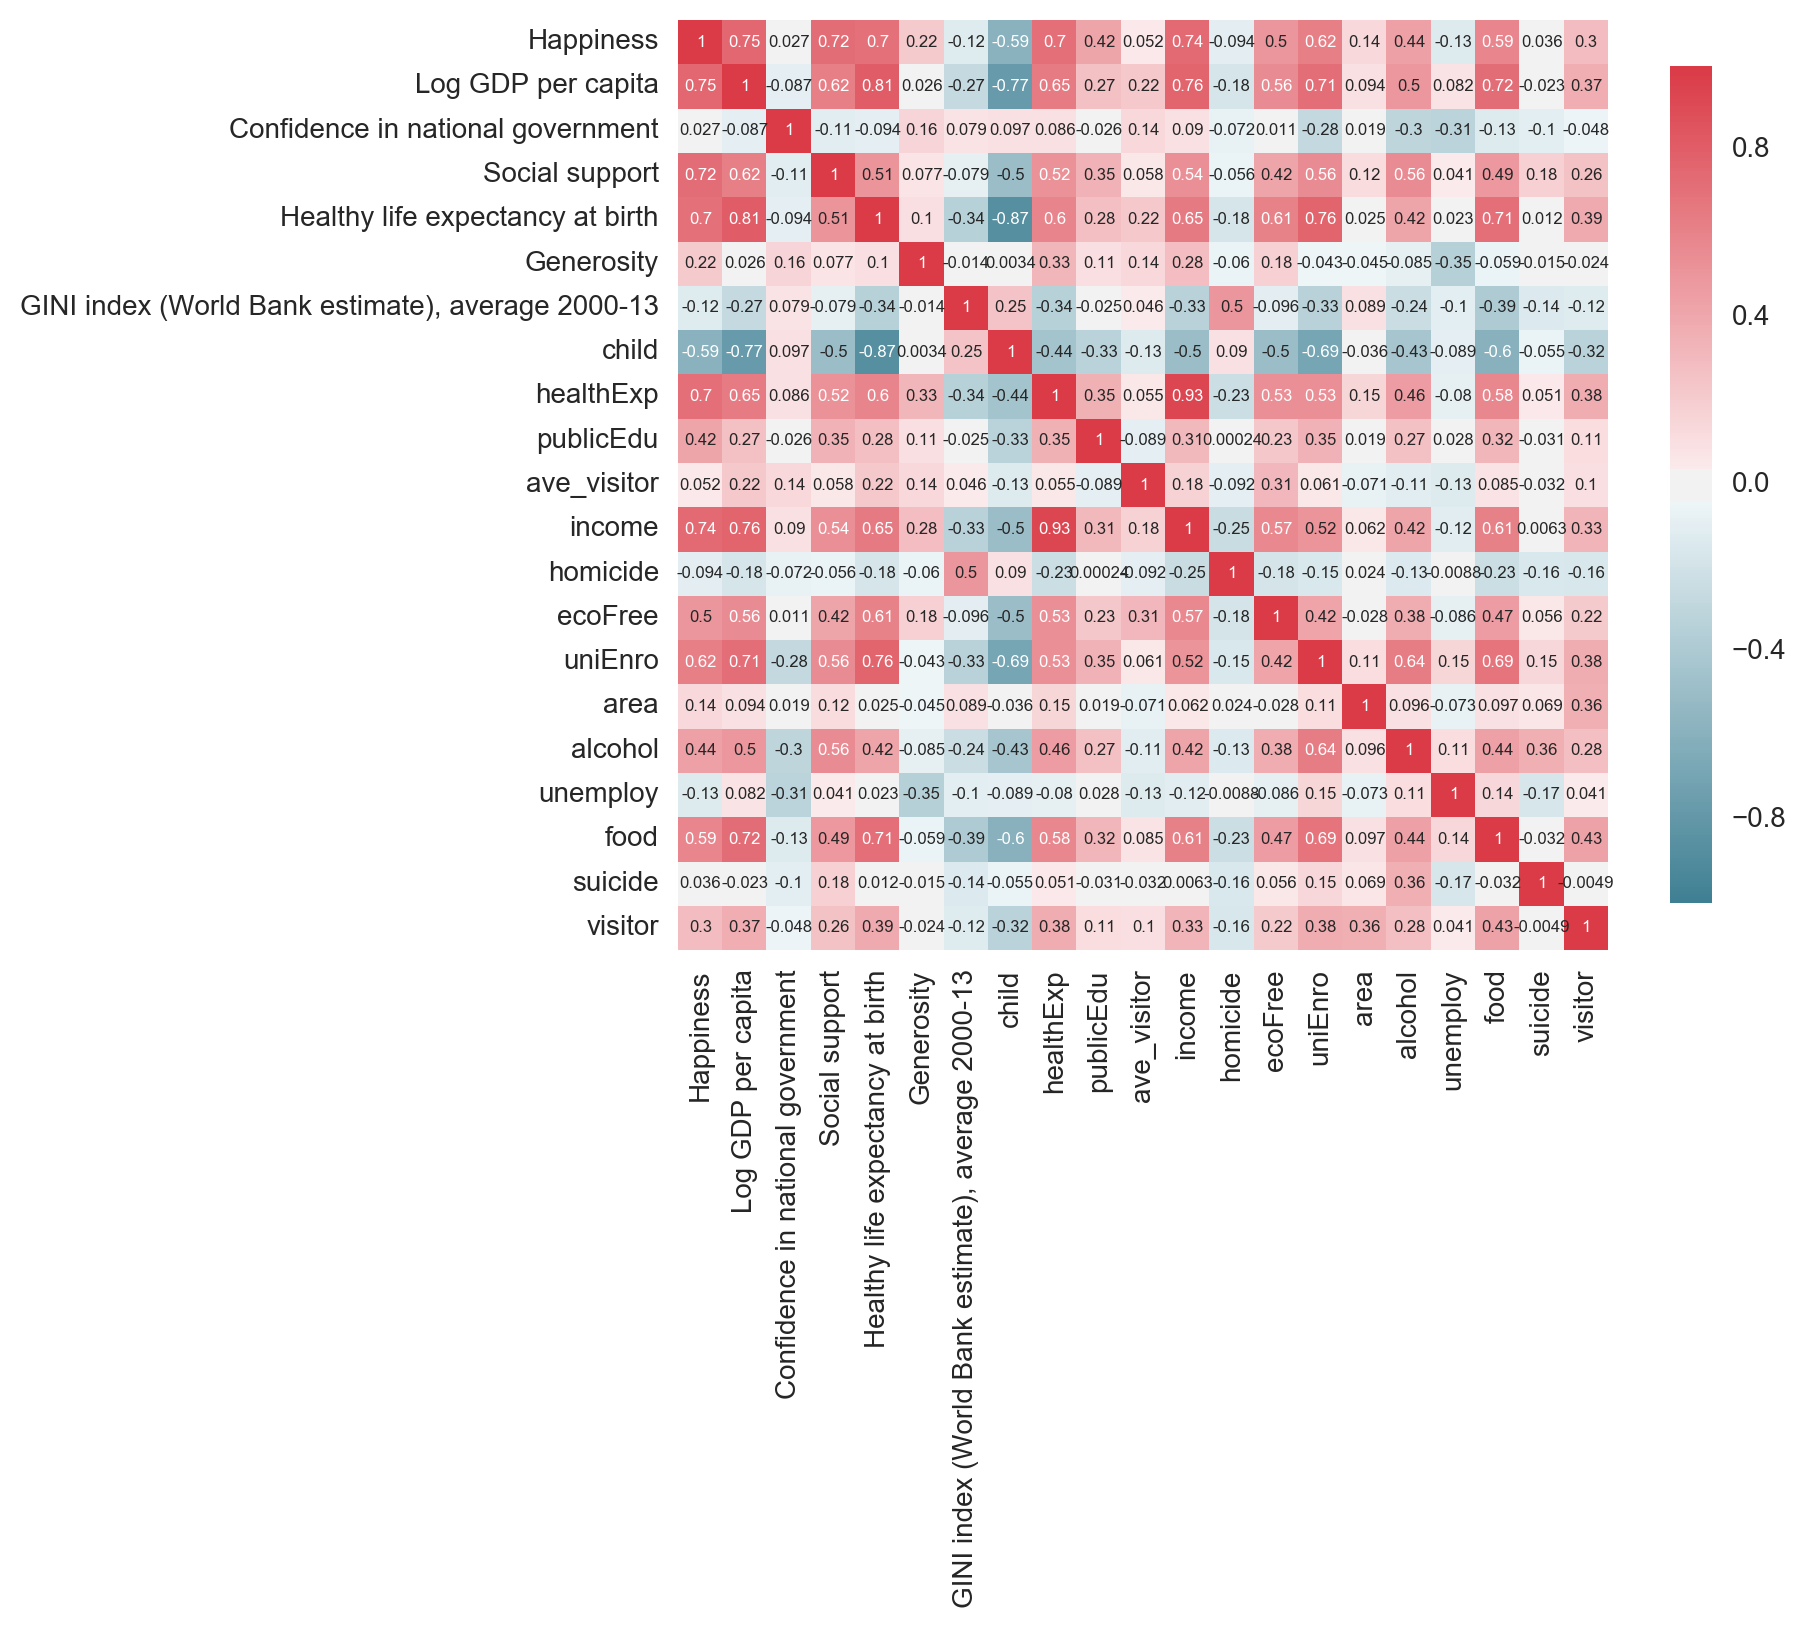

In [92]:
corr = dff.corr()
figure, ax = plt.subplots( figsize =( 8 , 6 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
correlation = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 6 })

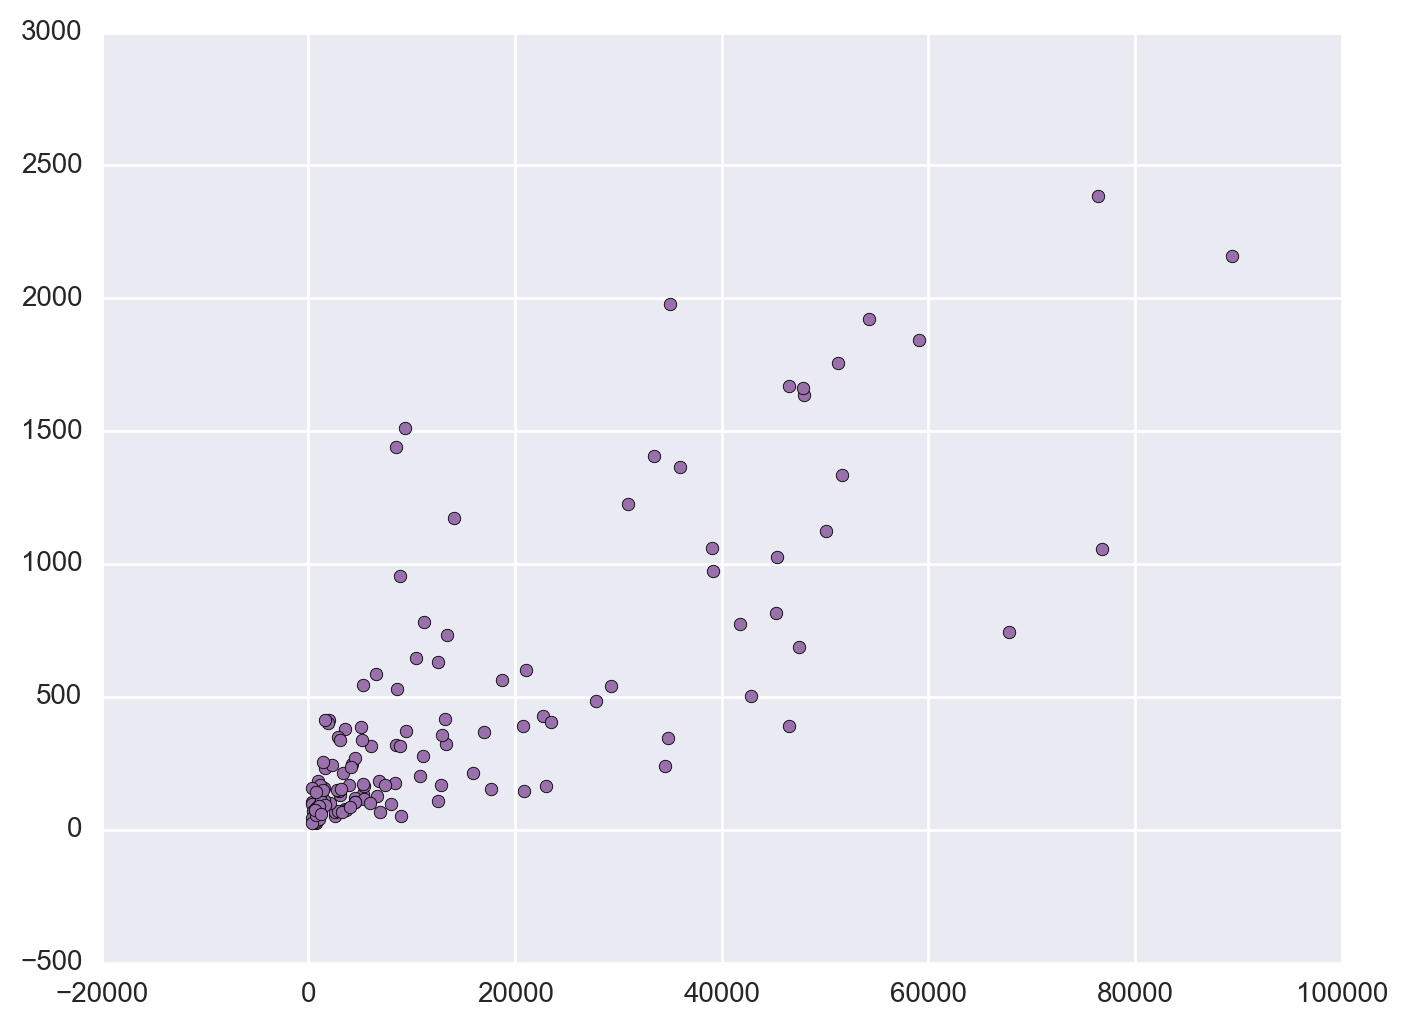

In [133]:
figure, ax = plt.subplots( figsize =( 8 , 6 ) )
ax.scatter(dff[dff.columns.values[11]],np.exp(dff['Happiness']),c='#9970ab', marker="o")